# IA Notebook: Ataques adversarios

In [1]:
import tensorflow as tf
import keras 

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K 

In [3]:
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
print(iv3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
from keras.preprocessing import image
from PIL import Image

In [17]:
x = image.img_to_array(image.load_img("data_notebook1/hacked.png", target_size=(299,299)))
# Para la red Inception es necesario que las matrices tengan valores desde -1 a 1
x /= 255 
x -= 0.5
x *= 2

#Añadimos delante un 1 para indicar el tamaño del lote
x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2])) 

y = iv3.predict(x)
decode_predictions(y)

[[('n07749582', 'lemon', 0.99789655),
  ('n07747607', 'orange', 0.00094160024),
  ('n03950228', 'pitcher', 4.750142e-05),
  ('n03530642', 'honeycomb', 3.9879273e-05),
  ('n03388043', 'fountain', 3.720363e-05)]]

## Ataques adversarios

In [7]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951

loss = out_layer[0, target_class]

grad = K.gradients(loss, inp_layer)[0]

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

adv = np.copy(x)
pert = 0.01

max_pert = x + 0.01
min_pert = x - 0.01

cost = 0.0
while cost < 0.95:
    gr, cost = optimize_gradient([adv,0])
    adv += gr
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    print("Lemon cost:", cost)

Instructions for updating:
Use tf.cast instead.
Lemon cost: 0.00029265817
Lemon cost: 0.00029602455
Lemon cost: 0.0002992952
Lemon cost: 0.00030246685
Lemon cost: 0.00030565096
Lemon cost: 0.00030892482
Lemon cost: 0.00031228331
Lemon cost: 0.00031562583
Lemon cost: 0.00031903776
Lemon cost: 0.0003224428
Lemon cost: 0.000325833
Lemon cost: 0.0003291567
Lemon cost: 0.0003325245
Lemon cost: 0.00033593015
Lemon cost: 0.00033944464
Lemon cost: 0.0003430801
Lemon cost: 0.0003467648
Lemon cost: 0.0003503958
Lemon cost: 0.0003540512
Lemon cost: 0.00035776818
Lemon cost: 0.00036142214
Lemon cost: 0.00036504338
Lemon cost: 0.00036861695
Lemon cost: 0.00037219233
Lemon cost: 0.00037584818
Lemon cost: 0.0003794961
Lemon cost: 0.00038317754
Lemon cost: 0.0003869246
Lemon cost: 0.00039068665
Lemon cost: 0.00039448947
Lemon cost: 0.0003983136
Lemon cost: 0.00040221956
Lemon cost: 0.0004061525
Lemon cost: 0.00041021284
Lemon cost: 0.0004144208
Lemon cost: 0.0004186573
Lemon cost: 0.00042299676
Lemon 

Lemon cost: 0.32246232
Lemon cost: 0.23310438
Lemon cost: 0.19201894
Lemon cost: 0.32602134
Lemon cost: 0.21853672
Lemon cost: 0.27691984
Lemon cost: 0.25267592
Lemon cost: 0.28077012
Lemon cost: 0.16965102
Lemon cost: 0.41012958
Lemon cost: 0.20408434
Lemon cost: 0.30173725
Lemon cost: 0.2263563
Lemon cost: 0.24218524
Lemon cost: 0.34084755
Lemon cost: 0.15740107
Lemon cost: 0.20584679
Lemon cost: 0.38459805
Lemon cost: 0.24607158
Lemon cost: 0.20550433
Lemon cost: 0.28368166
Lemon cost: 0.36651176
Lemon cost: 0.090348475
Lemon cost: 0.54127306
Lemon cost: 0.1930022
Lemon cost: 0.32238638
Lemon cost: 0.434925
Lemon cost: 0.15569445
Lemon cost: 0.2244708
Lemon cost: 0.40981147
Lemon cost: 0.28711072
Lemon cost: 0.2374316
Lemon cost: 0.41763666
Lemon cost: 0.22386526
Lemon cost: 0.32476774
Lemon cost: 0.42566556
Lemon cost: 0.14373226
Lemon cost: 0.47668466
Lemon cost: 0.047932487
Lemon cost: 0.52568763
Lemon cost: 0.2064954
Lemon cost: 0.248619
Lemon cost: 0.20560059
Lemon cost: 0.1998

<function matplotlib.pyplot.show(*args, **kw)>

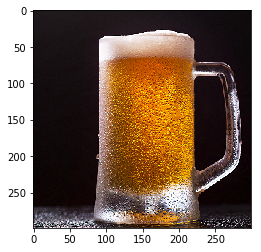

In [8]:
adv /=2
adv += 0.5
adv *=255

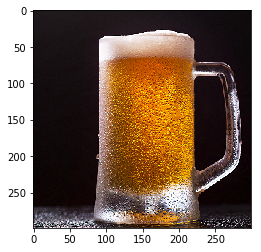

In [12]:
plt.imshow(adv[0].astype(np.uint8))

In [16]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("./data_notebook1/hacked.png")